In [ ]:
'''code to compare detection boxes
STEPS:
    1. split video into left & right - done
    
    2. take 2 images, one from each, & find overlapping FOV
    Common FOV (using frames l_1 & r_1):
    Left image: [(720, 0), (245, 16), (370, 514), (720, 540)]
    Right image: [(0, 0), (333, 9), (308, 516), (0, 540)]

    
    3. run detection on the 2 videos & get boxes - saved as log file
    
    
    4. find detections in the FOV
    
    5. compare from overlapping FOVs
'''

## PART 1: get overlap in FOV from starting images in left & right views

In [1]:
import cv2
import cv2.xfeatures2d as cv
import numpy
from matplotlib import pyplot as plt

In [2]:
'''right image'''
right = 'C:/Users/DAR9KOR/Desktop/data/sample_datasets/distance_detection/data/video/right_images_overlap/r_1.jpg'
img1 = cv2.imread(r'C:/Users/DAR9KOR/Desktop/data/sample_datasets/distance_detection/data/video/right_images_overlap/r_1.jpg')  

'''left image'''
left = 'C:/Users/DAR9KOR/Desktop/data/sample_datasets/distance_detection/data/video/left_images_overlap/l_1.jpg'
img2 = cv2.imread(r'C:/Users/DAR9KOR/Desktop/data/sample_datasets/distance_detection/data/video/left_images_overlap/l_1.jpg')

In [3]:
''' convert to grayscale'''
t1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
t2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [4]:
''' get SIFT features/ descriptors - can replace with something else instead of SIFT, for higher version of openCV'''
sift=cv.SIFT_create()
#opencv>3.4.2.16 - SIFT not available

kp1, des1 = sift.detectAndCompute(t1, None)
kp2, des2 = sift.detectAndCompute(t2, None)


In [ ]:
''' length of descriptor : ususally 128'''
#len(des1[0])

In [ ]:
'''show keypoints in each image - for understanding only '''

#f=cv2.drawKeypoints(t1,kp1,None,[0,0,255],flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#plt.imshow(f)
#nf=cv2.drawKeypoints(t2,kp2,None,[255,0,0],flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#plt.imshow(nf)

In [5]:
'''find common keypoints in both images, using ratio test'''

bf = cv2.BFMatcher()

matches = bf.knnMatch(des1,des2, k=2) 
# knnMatch to get k best matches; else bf.match to get best match only
good1 = []
for m,n in matches:
    if m.distance < 0.65*n.distance:  # 0.65
        good1.append([m])

matches = bf.knnMatch(des2,des1, k=2)
good2 = []
for m,n in matches:
    if m.distance < 0.65*n.distance:  # 0.65
        good2.append([m])


good=[]
for i in good1:
    img1_id1=i[0].queryIdx
    img2_id1=i[0].trainIdx

    (x1,y1)=kp1[img1_id1].pt
    (x2,y2)=kp2[img2_id1].pt

    for j in good2:
        img1_id2=j[0].queryIdx
        img2_id2=j[0].trainIdx

        (a1,b1)=kp2[img1_id2].pt
        (a2,b2)=kp1[img2_id2].pt

        if (a1 == x2 and b1 == y2) and (a2 == x1 and b2 == y1):
            good.append(i)


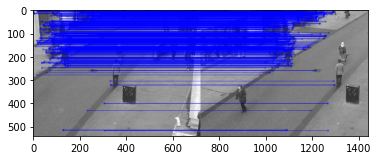

In [6]:
'''show the matches'''
len(good)
thres = int(0.75*len(good))
good_matches = good[:thres]  #10  # set this no. to 75% of matches(= len(good)) in prev. 2 step

result=cv2.drawMatchesKnn(t1,kp1,t2,kp2,good_matches,None,[0,0,255],flags=2)
plt.imshow(result)

In [7]:
good_matches

[[<DMatch 000001D3577C0470>],
 [<DMatch 000001D3577C0470>],
 [<DMatch 000001D3577C0410>],
 [<DMatch 000001D3577C0410>],
 [<DMatch 000001D3577C0430>],
 [<DMatch 000001D3577C03D0>],
 [<DMatch 000001D3577C0330>],
 [<DMatch 000001D3577C0290>],
 [<DMatch 000001D3577C0290>],
 [<DMatch 000001D3577C02B0>],
 [<DMatch 000001D3577C02B0>],
 [<DMatch 000001D3577C0170>],
 [<DMatch 000001D3577C00B0>],
 [<DMatch 000001D3577C0070>],
 [<DMatch 000001D3577C0230>],
 [<DMatch 000001D3577C01B0>],
 [<DMatch 000001D3577C01B0>],
 [<DMatch 000001D3577C04D0>],
 [<DMatch 000001D3577C04D0>],
 [<DMatch 000001D3577C0510>],
 [<DMatch 000001D3577C0550>],
 [<DMatch 000001D3577C0590>],
 [<DMatch 000001D3577C05D0>],
 [<DMatch 000001D3577C05D0>],
 [<DMatch 000001D3577C0610>],
 [<DMatch 000001D3577C0610>],
 [<DMatch 000001D3577C0650>],
 [<DMatch 000001D3577C0690>],
 [<DMatch 000001D3577C06D0>],
 [<DMatch 000001D3577C0710>],
 [<DMatch 000001D3577C0750>],
 [<DMatch 000001D3577C0790>],
 [<DMatch 000001D3577C07D0>],
 [<DMatch 

In [8]:
''' getting the keypoint coordinates (x,y) sorted by x or y '''
list_kp1 = []
list_kp2 = []
for mat in good_matches:
    img1_idx = mat[0].queryIdx
    img2_idx = mat[0].trainIdx

    # Get the coordinates
    (x1, y1) = kp1[img1_idx].pt
    (x2, y2) = kp2[img2_idx].pt

    # Append to each list
    list_kp1.append((int(x1), int(y1)))
    list_kp2.append((int(x2), int(y2)))
    
list_kp1 = sorted(list_kp1, key=lambda k : k[0])  # sort by value of x-coord in (x,y) 
list_kp2 = sorted(list_kp2, key=lambda k : k[0])

list_kp1 = sorted(list_kp1, key=lambda k : k[1])  # sort by value of y-coord in (x,y) 
list_kp2 = sorted(list_kp2, key=lambda k : k[1])

In [ ]:
#print(list_kp2)
#list_kp1

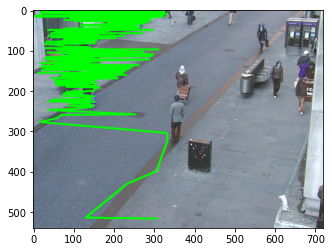

In [9]:
''' connecting keypoints with line on img1 '''
#im = img1
#for i in range(len(list_kp1)-1):
#    im = cv2.line(img1, list_kp1[i], list_kp1[i+1], (0,255,0), 3)
#plt.imshow(im)

In [ ]:
''' connecting keypoints with line on img2 '''
#im = img2
#for i in range(len(list_kp2)-1):
#    im = cv2.line(img2, list_kp2[i], list_kp2[i+1], (0,255,0), 3)
#plt.imshow(im)

In [ ]:
#list_kp1
#list_kp2

In [11]:
'''for the right hand side image,'''
# take x- coordinates of keypoints which are  having higher value
# right image uploaded as img1

x_max= list_kp1[0][0]   # list_kp1[0][0]; changed indices from 1 to 2
listabv_1=[]
for i in range(len(list_kp1)):
    if list_kp1[i][0]>=x_max:
        listabv_1.append(list_kp1[i])
        x_max = list_kp1[i][0]
listbel_1 = []
x_max = list_kp1[len(list_kp1)-1][0]
for i in range(len(list_kp1)):
    i=len(list_kp1)-i-1
    if list_kp1[i][0]>=x_max:
        listbel_1.append(list_kp1[i])
        x_max = list_kp1[i][0]

list_1=[]

#list_1.append((img1.shape[1],0))  # image width
list_1.append((0,0))
list_1.append((listabv_1[0][0],0))
[list_1.append(listabv_1[i]) for i in range(len(listabv_1))]
[list_1.append(listbel_1[len(listbel_1)-1-i]) for i in range(1,len(listbel_1))]
list_1.append((listbel_1[0][0],img1.shape[0]))
#list_1.append((img1.shape[1],img1.shape[0]))  # image width, height
list_1.append((0,img1.shape[0]))

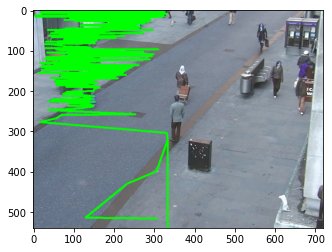

In [12]:
#im = cv2.line(img1, (listabv_1[0][0],0), listabv_1[0], (0,255,0), 3)
'''#for i in range(len(listabv_1)-1):
#    im = cv2.line(img2, listabv_1[i], listabv_1[i+1], (0,255,0), 3)'''
#im = cv2.line(img1, listabv_1[len(listabv_1)-1], (listabv_1[len(listabv_1)-1][0],img1.shape[0]),
#              (0,255,0), 3)
#plt.imshow(im)

In [13]:
''' for the left hand side image, '''
#take x- coordinates of keypoints which are  having lower value
# left image uploaded as img2

x_min=list_kp2[0][0]
listabv_2=[]
for i in range(len(list_kp2)):
    if list_kp2[i][0]<=x_min:
        listabv_2.append(list_kp2[i])
        x_min = list_kp2[i][0]
listbel_2 = []
x_min = list_kp2[len(list_kp2)-1][0]
for i in range(len(list_kp2)):
    i=len(list_kp2)-i-1
    if list_kp2[i][0]<=x_min:
        listbel_2.append(list_kp2[i])
        x_min = list_kp2[i][0]


list_2=[]
list_2.append((img2.shape[1],0))  # image width
list_2.append((listabv_2[0][0],0))
[list_2.append(listabv_2[i]) for i in range(len(listabv_2))]
[list_2.append(listbel_2[len(listbel_2)-1-i]) for i in range(1,len(listbel_2))]
list_2.append((listbel_2[0][0],img2.shape[0]))
list_2.append((img2.shape[1],img2.shape[0]))  # image width, height


#im = cv2.line(img2, (listabv_2[0][0],0), listabv_2[0], (0,255,0), 3)
'''#for i in range(len(listabv_1)-1):
#    im = cv2.line(img2, listabv_1[i], listabv_1[i+1], (0,255,0), 3)'''
#im = cv2.line(img2, listabv_2[len(listabv_2)-1], (listabv_2[len(listabv_2)-1][0],img2.shape[0]),
#              (0,255,0), 3)
#plt.imshow(im)

'#for i in range(len(listabv_1)-1):\n#    im = cv2.line(img2, listabv_1[i], listabv_1[i+1], (0,255,0), 3)'

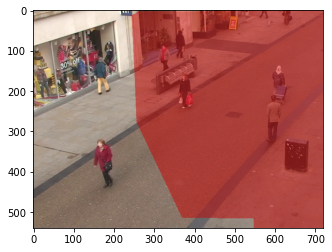

In [14]:
''' overlay for left image'''
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

#image = Image.open(r'C:\Users\DAR9KOR\Documents\socialdistancing_motpy\socialdistancing\data\raw\0_left.jpg')
image = Image.open(left)

overlay = image.copy()
output = image.copy()

draw = ImageDraw.Draw(overlay)  # ImageDraw.Draw(Image.fromarray(overlay))

# points = ((1,1), (2,1), (2,2), (1,2), (0.5,1.5))
# points = ((100, 100), (200, 100), (200, 200), (100, 200), (50, 150))
draw.polygon(list_2, fill=200)
#draw.polygon(list_2_n, fill=200)  '''see below'''


overlay = numpy.array(overlay)
output = numpy.array(output)

cv2.addWeighted(overlay, 0.5, output, 0.5, 0, output)
plt.imshow(output)

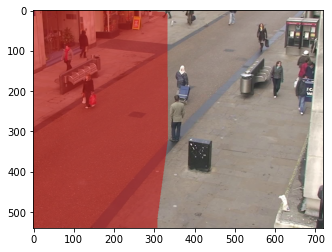

In [15]:
''' overlay for right image'''
#import PIL.ImageDraw as ImageDraw
#import PIL.Image as Image

#image = Image.open(r'C:\Users\DAR9KOR\Documents\socialdistancing_motpy\socialdistancing\data\raw\0_right.jpg')
image = Image.open(right)

overlay = image.copy()
output = image.copy()

draw = ImageDraw.Draw(overlay)  # ImageDraw.Draw(Image.fromarray(overlay))

# points = ((1,1), (2,1), (2,2), (1,2), (0.5,1.5))
# points = ((100, 100), (200, 100), (200, 200), (100, 200), (50, 150))
draw.polygon(list_1, fill=200)
#draw.polygon(list_1_n, fill=200)  '''see below'''

overlay = numpy.array(overlay)
output = numpy.array(output)

cv2.addWeighted(overlay, 0.5, output, 0.5, 0, output)
plt.imshow(output)

# output = output*5+overlay*5


In [16]:
'''selecting 4 points to denote minimal ROI'''

######################################
''' for left image: list_2 '''
'''top right'''
list_2_n=[]
list_2_n.append((img2.shape[1],0))  # image width

'''top left'''
y1 = 0 #list_2[0][0]
x1 = 0
#listabv_2=[]
for i in range(len(list_2)):
    if list_2[i][1] <= int(0.1 * img2.shape[0]):
        y1 = list_2[i][1]
        x1 = list_2[i][0]

'''bottom left:scroll the list in reverse'''
y2 = 0
x2 = 0
for i in range(len(list_2)):
    i=len(list_2)-i-1
    if list_2[i][1] >= int(0.9 * img2.shape[0]):
        y2 = list_2[i][1]
        x2 = list_2[i][0]

list_2_n.append((x1,y1))
list_2_n.append((x2,y2))
'''bottom right'''
list_2_n.append((img2.shape[1],img2.shape[0]))
print('left image: ', list_2_n)


########################################
''' for right image: list_1 '''
'''top left'''

list_1_n=[]
list_1_n.append((0,0))  # image width

'''top right'''
y1 = 0 #list_2[0][0]
x1 = 0
#listabv_2=[]
for i in range(len(list_1)):
    if list_1[i][1] <= int(0.1 * img1.shape[0]):
        y1 = list_1[i][1]
        x1 = list_1[i][0]

'''bottom rightt:scroll the list in reverse'''
y2 = 0
x2 = 0
for i in range(len(list_1)):
    i=len(list_1)-i-1
    if list_1[i][1] >= int(0.9 * img1.shape[0]):
        y2 = list_1[i][1]
        x2 = list_1[i][0]

list_1_n.append((x1,y1))
list_1_n.append((x2,y2))
'''bottom left'''
list_1_n.append((0,img1.shape[0]))
print('right image: ', list_1_n)

left image:  [(720, 0), (245, 16), (370, 514), (720, 540)]
right image:  [(0, 0), (333, 9), (308, 516), (0, 540)]


## compare left & right views (multiple videos) to get common detections

In [17]:
#import cv2
#import cv2.xfeatures2d as cv
#import numpy
#from matplotlib import pyplot as plt
#import json
import ast
#from skimage.measure import structural_similarity as ssim
from skimage.metrics import structural_similarity as ssim
import pandas as pd

In [18]:
''' common FOV'''
left_FOV = [(720, 0), (245, 16), (370, 514), (720, 540)] # order: top-right, top-left, bottom-left, bottom-right
right_FOV = [(0, 0), (333, 9), (308, 516), (0, 540)]  # order: top-left, top-right, bottom-right, bottom-left

In [19]:
'''extract detections for the corresponding frames'''
path = "C:/Users/DAR9KOR/Desktop/data/sample_datasets/distance_detection/data/multi_camera_tracking/SIFT_keypoint_match/"

# left image detections
file = path + "l_163_log.json"
with open(file, 'r') as f:
    data = f.read() #json.load(f)
    data = "\"".join(data.split("'"))
    left_pred = ast.literal_eval(data)

print('left pred')
print(left_pred)
print('')
# f = open(file)
# dat = f.read()
# dat = "\"".join(dat.split("'"))
# left_pred = json.loads(dat)[0] #json.loads(json.dumps(dat))[0] #json.loads(dat) #json.loads(json.dumps(dat))
# type(left_pred)
# f.close()


# right image detections
file = path + "r_163_log.json"
with open(file, 'r') as f2:
    data = f2.read() #json.load(f)
    data = "\"".join(data.split("'"))
    right_pred = ast.literal_eval(data)
print('right pred')
print(right_pred)

left pred
{'crowd_count': 15, 'groups': {3: 2, 5: 2, 9: 2}, 'unsafe': 6, 'violations': 3, 'results': [{'label': 0, 'id': 43627, 'score': 1, 'xmin': 574.7319769543333, 'ymin': 209.2650832175055, 'xmax': 613.8089041666833, 'ymax': 324.25804061697175}, {'label': 0, 'id': 52388, 'score': 1, 'xmin': 63.77091898161312, 'ymin': 193.09069841738918, 'xmax': 115.5889226151459, 'ymax': 296.0687806274841}, {'label': 0, 'id': 14750, 'score': 1, 'xmin': 320.779362173022, 'ymin': 164.7793811927316, 'xmax': 350.7893689170443, 'ymax': 259.76899569593604}, {'label': 0, 'id': 3273, 'score': 1, 'xmin': 599.6600368821415, 'ymin': 35.28164286026897, 'xmax': 624.3965054970732, 'ymax': 105.9002169836125}, {'label': 0, 'id': 41756, 'score': 1, 'xmin': 358.1497824830185, 'ymin': 38.14122677612675, 'xmax': 384.06935484060807, 'ymax': 119.32262271934468}, {'label': 0, 'id': 30475, 'score': 1, 'xmin': 279.7788774285321, 'ymin': 279.9004756287675, 'xmax': 328.3451423294651, 'ymax': 401.6453082163696}, {'label': 0, 

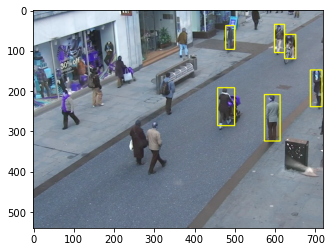

In [20]:
'''get detections within FOV'''

'''left image'''
img2 = cv2.imread(r'C:/Users/DAR9KOR/Desktop/data/sample_datasets/distance_detection/data/video/left_images_overlap/l_163.jpg')
#output (this is the figure with FOV superposed from matching.py)

left_list = []
for i in range(0,len(left_pred["results"])):
    xmin = left_pred["results"][i]["xmin"]
    ymin = left_pred["results"][i]["ymin"]
    ymax = left_pred["results"][i]["ymax"]
    xmax = left_pred["results"][i]["xmax"]
    tid = left_pred["results"][i]["id"]
    if ymin >= left_FOV[1][1] and ymax <= left_FOV[2][1] and xmin >= left_FOV[1][0] and xmin >= left_FOV[2][0]:
        left_list.append(left_pred["results"][i])
        # check if the boxes saved here are correct, by printing them onto the image
        cv2.rectangle(img2, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255,255,0), 2)
        #text = "{}:".format(tid)
        #cv2.putText(output, tid, (int(xmin), (ymin) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
#cv2.imshow("Image", img2)  
plt.imshow(img2)  #output

# detections on entire image
# img2 = cv2.imread(r'C:/Users/DAR9KOR/Desktop/data/sample_datasets/distance_detection/data/video/left_images_overlap/l_163.jpg')
# for i in range(0,len(left_pred["results"])):
#     xmin = left_pred["results"][i]["xmin"]
#     ymin = left_pred["results"][i]["ymin"]
#     ymax = left_pred["results"][i]["ymax"]
#     xmax = left_pred["results"][i]["xmax"]
#     tid = left_pred["results"][i]["id"]
#     cv2.rectangle(img2, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255,255,0), 2)
#     text = "{}:".format(tid)
#     cv2.putText(img2, text, (int(xmin), int(ymin) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
# plt.imshow(img2)   #cv2.imwrite("C:/Users/DAR9KOR/Desktop/test.jpg", img2)

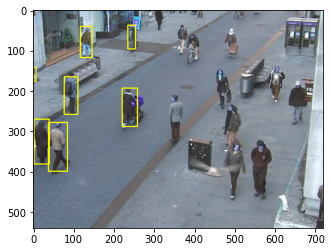

In [21]:
'''right image'''
img1 = cv2.imread(r'C:/Users/DAR9KOR/Desktop/data/sample_datasets/distance_detection/data/video/right_images_overlap/r_163.jpg')

right_list = []
for i in range(0,len(right_pred["results"])):
    xmax = right_pred["results"][i]["xmax"]
    ymin = right_pred["results"][i]["ymin"]
    ymax = right_pred["results"][i]["ymax"]
    xmin = right_pred["results"][i]["xmin"]
    tid = right_pred["results"][i]["id"]
    ###print(tid, (ymin, right_FOV[1][1]), (ymax, right_FOV[2][1]), (xmax, right_FOV[1][0], right_FOV[2][0]))
    ###print(type(ymin), type(right_FOV[1][1]))
    if ymin >= float(right_FOV[1][1]) and ymax <= float(right_FOV[2][1]) and xmax <= float(right_FOV[1][0]) and xmax <= float(right_FOV[2][0]):
        right_list.append(right_pred["results"][i])
        # check if the boxes saved here are correct, by printing them onto the image
        cv2.rectangle(img1, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255,255,0), 2)
        #text = "{}:".format(tid)
        #cv2.putText(output, text, (int(xmin), int(ymin) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
plt.imshow(img1) #output


# detections on entire image
# img1 = cv2.imread(r'C:/Users/DAR9KOR/Desktop/data/sample_datasets/distance_detection/data/video/right_images_overlap/r_163.jpg')
# for i in range(0,len(right_pred["results"])):
#     xmin = right_pred["results"][i]["xmin"]
#     ymin = right_pred["results"][i]["ymin"]
#     ymax = right_pred["results"][i]["ymax"]
#     xmax = right_pred["results"][i]["xmax"]
#     tid = right_pred["results"][i]["id"]
#     cv2.rectangle(img1, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255,255,0), 2)
#     text = "{}:".format(tid)
#     cv2.putText(img1, text, (int(xmin), int(ymin) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
# plt.imshow(img1)  
# cv2.imwrite("C:/Users/DAR9KOR/Desktop/test.jpg", img1)

In [22]:
'''compare & find common detections'''
# https://stackoverflow.com/questions/11541154/how-can-i-assess-how-similar-two-images-are-with-opencv
# comparing histograms, template matching, feature matching
# https://gist.github.com/duhaime/211365edaddf7ff89c0a36d9f3f7956c

#left_com = []
#right_com = []

df = []



### convert the images to gray_scale, for SSIM  & sift_sim
img_left = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img_right = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)



### convert images to HSV, for histogram matching
img_left = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
img_right = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
### histogram parameters
h_bins = 50
s_bins = 60
histSize = [h_bins, s_bins]
# hue varies from 0 to 179, saturation from 0 to 255
h_ranges = [0, 180]
s_ranges = [0, 256]
ranges = h_ranges + s_ranges # concat lists
# Use the 0-th and 1-st channels
channels = [0, 1]



### feature matching
def sift_sim(l_crop, r_crop):
  '''   Use SIFT features to measure image similarity  '''
  # get the detection regions: l_crop, r_crop
  
  # initialize the sift feature detector
  #orb = cv2.ORB_create()    # cv.SIFT_create()
  # find the keypoints and descriptors with SIFT (inputs should be grayscale)
  #kp_a, desc_a = orb.detectAndCompute(l_crop, None)  # sift.detectAndCompute(l_crop, None)
  #kp_b, desc_b = orb.detectAndCompute(r_crop, None)

  # initialize the bruteforce matcher
  #bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  
  # match.distance is a float between {0:100} - lower means more similar
  #matches = bf.match(desc_a, desc_b)
  #similar_regions = [i for i in matches if i.distance < 70]
  #if len(matches) == 0:
  #  return 0
  #return len(similar_regions) / len(matches)  
  
  
  # initialize detector
  sift=cv.SIFT_create()
  # find the keypoints and descriptors with SIFT (inputs should be grayscale)
  kp1, desc_a = sift.detectAndCompute(l_crop, None)
  kp2, desc_b = sift.detectAndCompute(r_crop, None)
  

  # initialize the bruteforce matcher
  bf = cv2.BFMatcher()

  # match
  matches = bf.knnMatch(desc_a,desc_b, k=2)
  good1 = []
  for m,n in matches:
      if m.distance < 0.65*n.distance:  # 0.65
        good1.append([m])

  matches = bf.knnMatch(desc_b,desc_a, k=2)
  good2 = []
  for m,n in matches:
    if m.distance < 0.65*n.distance:  # 0.65
        good2.append([m])
  
  good=[]
  for i in good1:
    img1_id1=i[0].queryIdx
    img2_id1=i[0].trainIdx

    (x1,y1)=kp1[img1_id1].pt
    (x2,y2)=kp2[img2_id1].pt

    for j in good2:
        img1_id2=j[0].queryIdx
        img2_id2=j[0].trainIdx

        (a1,b1)=kp2[img1_id2].pt
        (a2,b2)=kp1[img2_id2].pt

        if (a1 == x2 and b1 == y2) and (a2 == x1 and b2 == y1):
            good.append(i)

  
  if len(matches) == 0:
    return 0
  return len(good) / len(matches)


###################################################
### crop the box & compare 
for i in range(0,len(left_list)):
    for j in range(0,len(right_list)):
        
        # left_crop
        start_x = round(left_list[i]["xmin"]) # use round instead of int
        end_x = round(left_list[i]["xmax"])
        start_y = round(left_list[i]["ymin"])
        end_y = round(left_list[i]["ymax"])
        l_id = left_list[i]["id"]
        #print(end_x - start_x, end_y - start_y)
        l_crop = img_left[start_y:end_y, start_x:end_x]  # startY and endY coordinates, followed by the startX and endX coordinates
        
        # right crop
        start_x = round(right_list[j]["xmin"])
        end_x = round(right_list[j]["xmax"])
        start_y = round(right_list[j]["ymin"])
        end_y = round(right_list[j]["ymax"])
        r_id = right_list[j]["id"]
        #print(end_x - start_x, end_y - start_y)
        r_crop = img_right[start_y:end_y, start_x:end_x]
        
        
        ### sift similarity
        s = sift_sim(l_crop,r_crop)
        df.append([i,l_id,j,r_id,s])
        
        
        '''
        ### compare with SSIM (structural similarity index) - requires input images in grayscale format
        # s = ssim(l_crop,r_crop)
        # this works only if the crops are of the same size
        # but resizing may be affecting quality of match
        s = ssim(cv2.resize(l_crop,(50,150)), cv2.resize(r_crop,(50,150)))
        #print(i,l_id,j,r_id,s)
        # 4 40055 3 29971 0.5484132000847112
        # 5 8774 5 55193 0.2181087538131895
        # see below, values reduced further with cubic interpolation during resize
        #s = ssim(cv2.resize(l_crop,(50,150),interpolation=cv2.INTER_CUBIC), cv2.resize(r_crop,(50,150),interpolation=cv2.INTER_CUBIC))
        #print(i,l_id,j,r_id,s)
        # 4 40055 3 29971 0.4985266258721171
        # 5 8774 5 55193 0.1612343079955875
        df.append([i,l_id,j,r_id,s])
        '''
        
        '''
        ### using histogram comparison
        # https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html
        # https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga994f53817d621e2e4228fc646342d386
        hist_l = cv2.calcHist([l_crop], channels, None, histSize, ranges, accumulate=False)
        cv2.normalize(hist_l, hist_l, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        hist_r = cv2.calcHist([r_crop], channels, None, histSize, ranges, accumulate=False)
        cv2.normalize(hist_r, hist_r, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        # compareHist(image1, image2, comparison method=int)
        s = cv2.compareHist(hist_l, hist_r, 0)  # 0 : correlation (high for good match)
        s1 = cv2.compareHist(hist_l, hist_r, 1) # 1 : chi-square (low .....)
        s2 = cv2.compareHist(hist_l, hist_r, 2) # 2 : intersection  (high ....)
        s3 = cv2.compareHist(hist_l, hist_r, 3) # 3 : Bhattacharyya distance  (low ...)
        
        #print(i,l_id,j,r_id, s, s1, s2, s3)
        # 4 40055 3 29971 0.9897954971549056
        # 5 8774 5 55193 0.9829198170374923
        df.append([i,l_id,j,r_id, s, s1, s2, s3])
        #'''

'''
# save SSIM results
df = pd.DataFrame(df, columns=['i','i_id','j','r_id','SSIM'])
df = df.sort_values('SSIM',ascending=False)
df.to_excel(path+"ssim_match.xlsx", index=False)
'''

'''
# save hist results
df = pd.DataFrame(df, columns = ['i','l_id','j','r_id','corr','chi','intersect','bhat_dist'])        
df = df.sort_values('corr',ascending=False)
df.to_excel(path+"hist_match.xlsx", index=False)
'''

# save sift_sim results
df = pd.DataFrame(df, columns=['i','i_id','j','r_id','sift_sim'])
df = df.sort_values('sift_sim',ascending=False)
#df.to_excel(path+"sift_sim_match.xlsx", index=False)
print(df)

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\features2d\src\matchers.cpp:744: error: (-215:Assertion failed) _queryDescriptors.type() == trainDescType in function 'cv::BFMatcher::knnMatchImpl'
